<a href="https://colab.research.google.com/github/jbrenorv/ordenacao/blob/main/graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [707]:
import pandas as pd
import matplotlib.pyplot as plt

In [708]:
csv_url = 'https://raw.githubusercontent.com/jbrenorv/ordenacao/refs/heads/main/output/output_2025.07.15.csv'
df = pd.read_csv(csv_url)

In [709]:
inf_grupos = [[['Bolha'], ['Coquetel'], ['Seleção'], ['Inserção']]] * 3
sup_grupos = [[['Shellsort'], ['Mergesort'], ['Heapsort'], ['Quicksort']]] * 3
lin_grupos = [[['Contagem'], ['Balde'], ['Radixsort C.'], ['Radixsort B.']]] * 3

dado_label_map = {
    'comparacoes': 'Comparações',
    'movimentacoes': 'Movimentações',
    'tempo': 'Tempo em segundos'
}

tipo_label_map = {
    0: 'Crescente',
    1: 'Decrescente',
    2: 'Aleatório'
}

In [710]:
def plot_xy(titulo, grupos, ydata):
  fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
  fig.suptitle(f'{titulo} ({dado_label_map[ydata]})')

  for tipo, algoritmos in enumerate(grupos):
    axes[tipo].set_title(tipo_label_map[tipo])

    for _, algoritmo in enumerate(algoritmos):
      d = df[(df.algoritmo == algoritmo[0]) & (df.tipo == tipo)]
      medias = d.groupby('tamanho')[ydata].mean().reset_index()
      label = ", ".join(algoritmo)
      axes[tipo].plot(medias['tamanho'], medias[ydata], label=label)

    axes[tipo].grid()
    axes[tipo].legend(loc='upper left')

  fig.supxlabel('Tamanho do vetor')
  plt.tight_layout()
  plt.show()

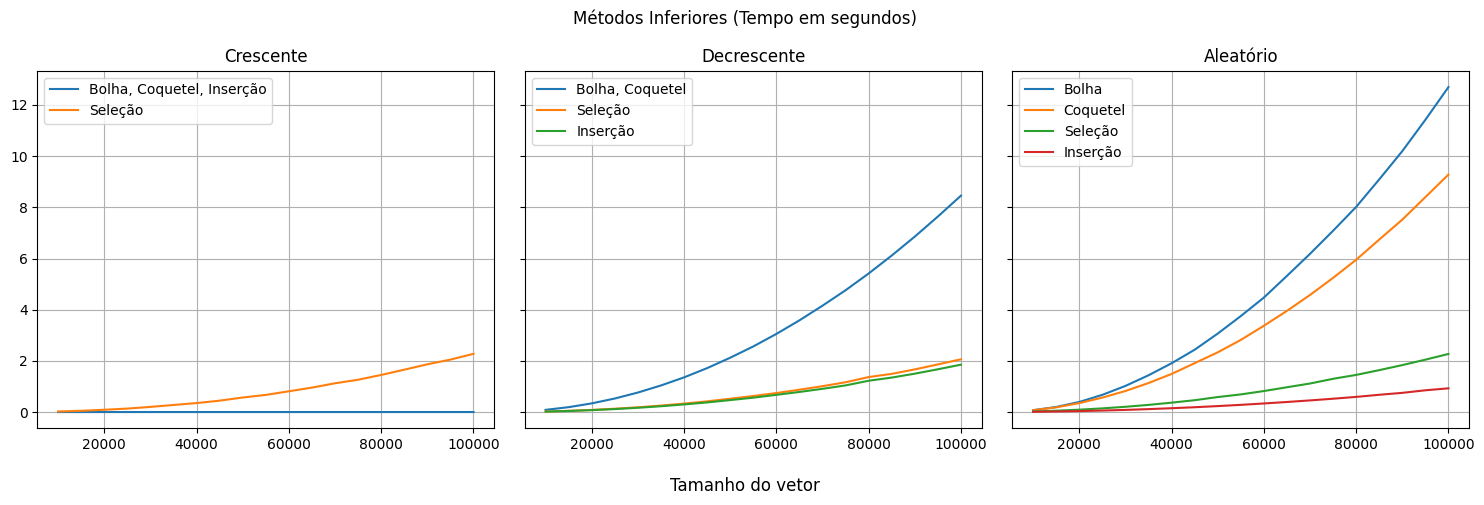

In [711]:
inf_reagrupados = inf_grupos.copy()
inf_reagrupados[0] = [['Bolha', 'Coquetel', 'Inserção'], ['Seleção']]
inf_reagrupados[1] = [['Bolha', 'Coquetel'], ['Seleção'], ['Inserção']]
plot_xy(titulo='Métodos Inferiores', grupos=inf_reagrupados, ydata='tempo')

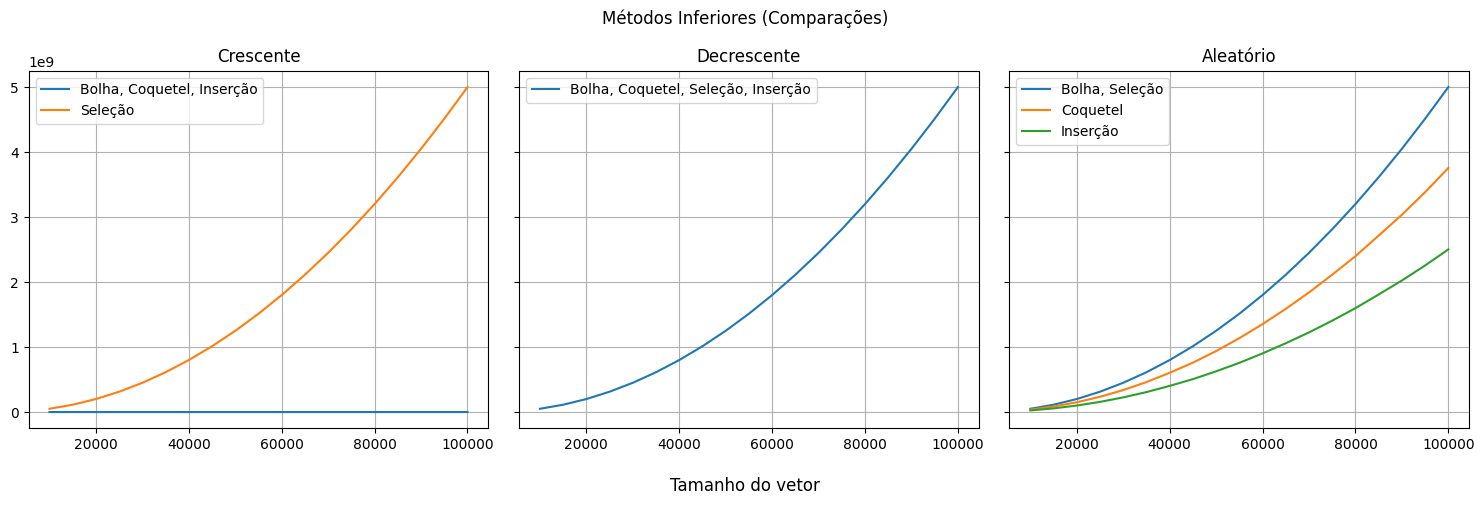

In [712]:
inf_reagrupados = inf_grupos.copy()
inf_reagrupados[0] = [['Bolha', 'Coquetel', 'Inserção'], ['Seleção']]
inf_reagrupados[1] = [['Bolha', 'Coquetel', 'Seleção', 'Inserção']]
inf_reagrupados[2] = [['Bolha', 'Seleção'], ['Coquetel'], ['Inserção']]
plot_xy(titulo='Métodos Inferiores', grupos=inf_reagrupados, ydata='comparacoes')

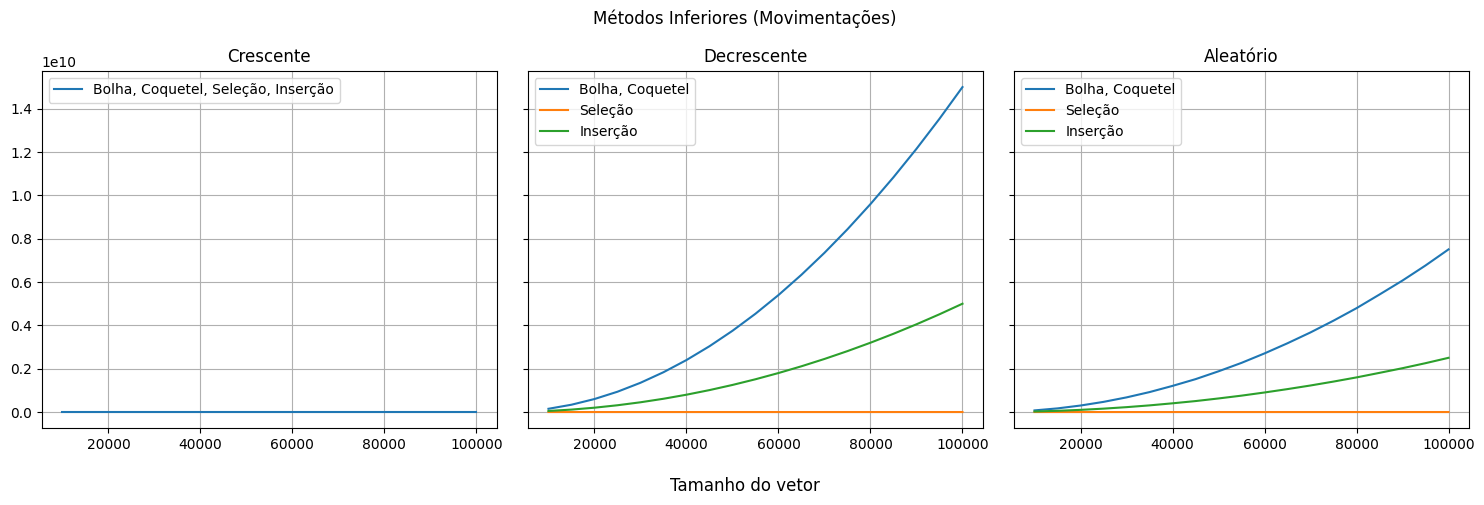

In [713]:
inf_reagrupados = inf_grupos.copy()
inf_reagrupados[0] = [['Bolha', 'Coquetel', 'Seleção', 'Inserção']]
inf_reagrupados[1] = [['Bolha', 'Coquetel'], ['Seleção'], ['Inserção']]
inf_reagrupados[2] = [['Bolha', 'Coquetel'], ['Seleção'], ['Inserção']]
plot_xy(titulo='Métodos Inferiores', grupos=inf_reagrupados, ydata='movimentacoes')

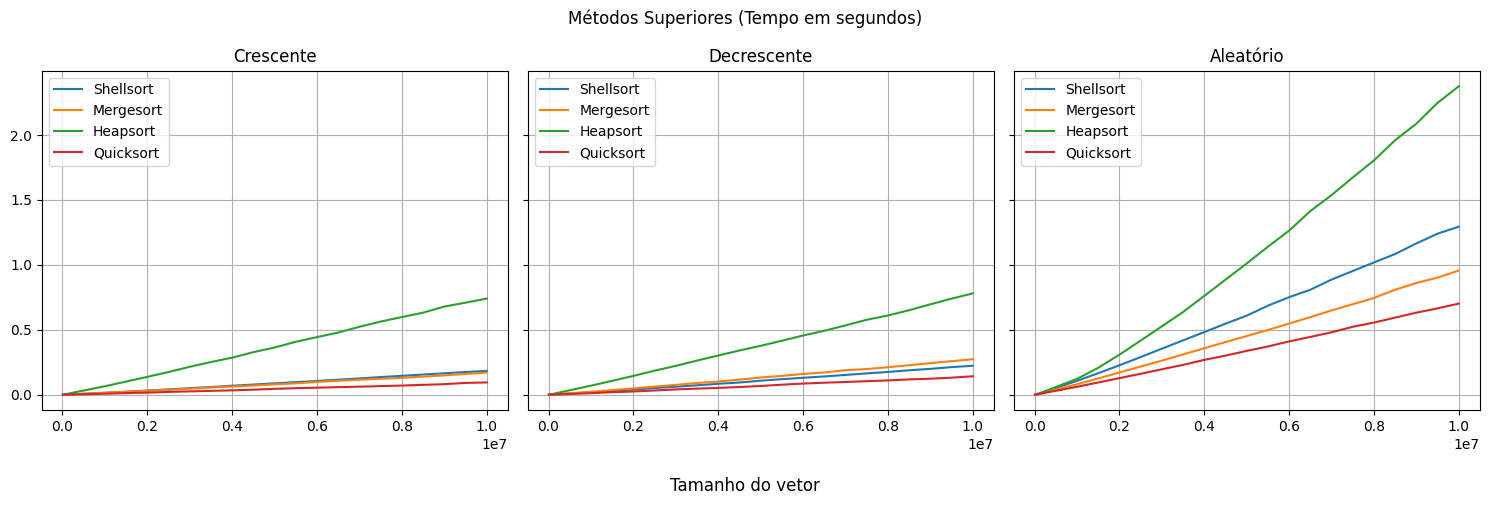

In [714]:
plot_xy(titulo='Métodos Superiores', grupos=sup_grupos, ydata='tempo')

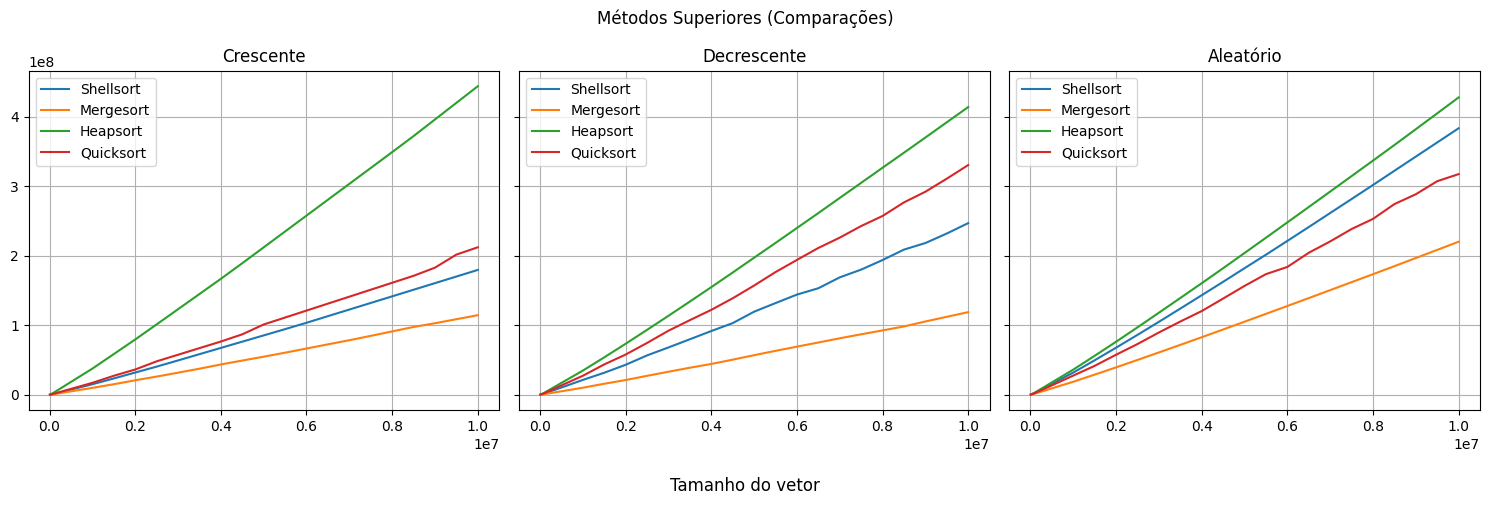

In [715]:
plot_xy(titulo='Métodos Superiores', grupos=sup_grupos, ydata='comparacoes')

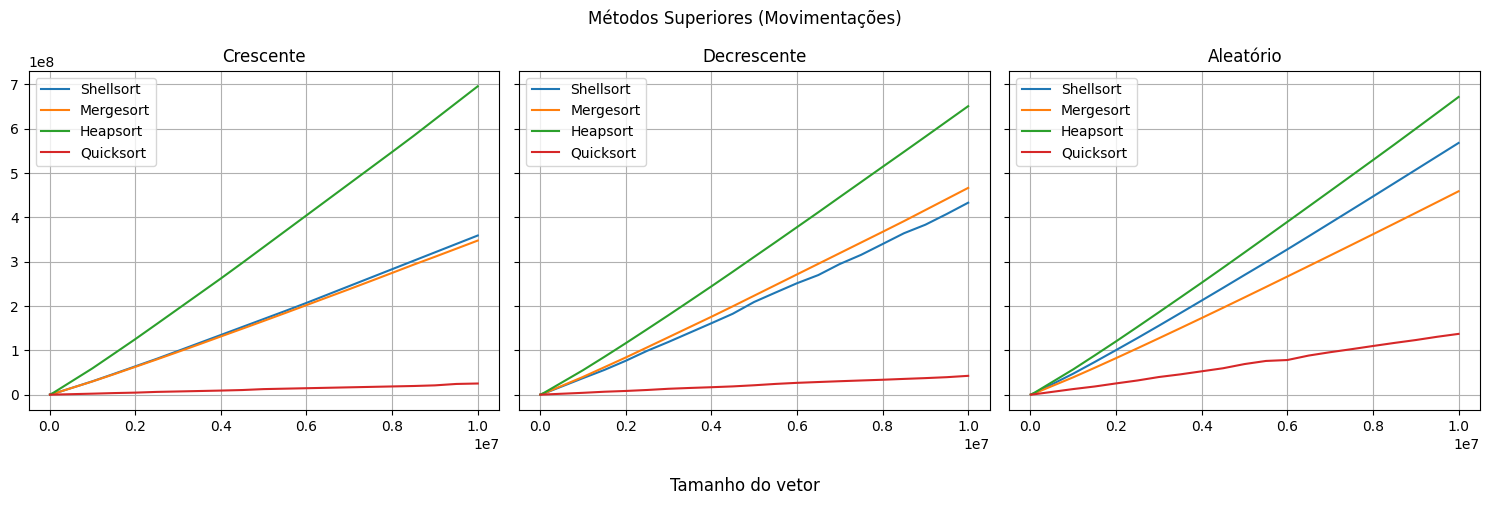

In [716]:
plot_xy(titulo='Métodos Superiores', grupos=sup_grupos, ydata='movimentacoes')

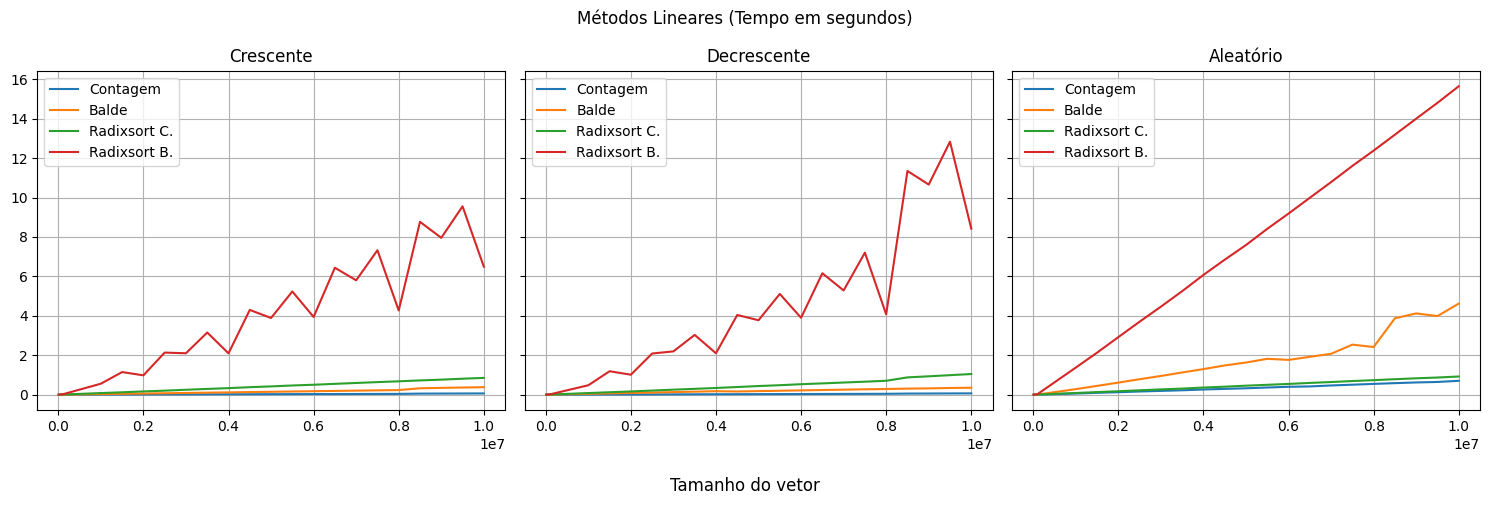

In [717]:
plot_xy(titulo='Métodos Lineares', grupos=lin_grupos, ydata='tempo')

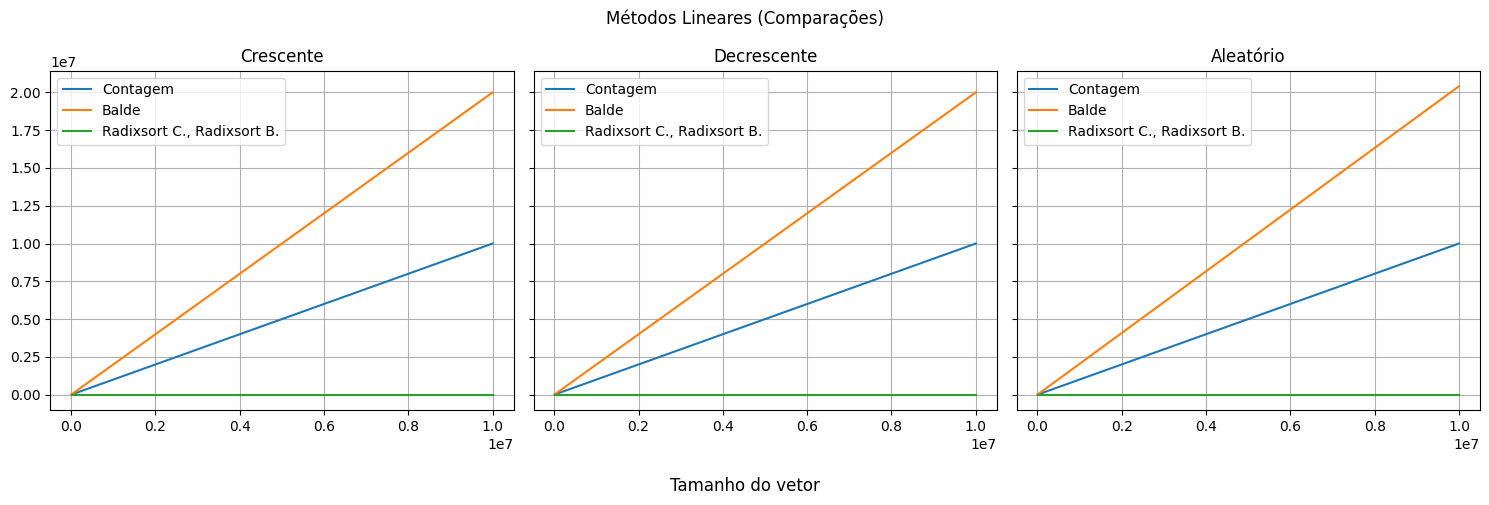

In [718]:
lin_reagrupados = lin_grupos.copy()
lin_reagrupados[0] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
lin_reagrupados[1] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
lin_reagrupados[2] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
plot_xy(titulo='Métodos Lineares', grupos=lin_reagrupados, ydata='comparacoes')

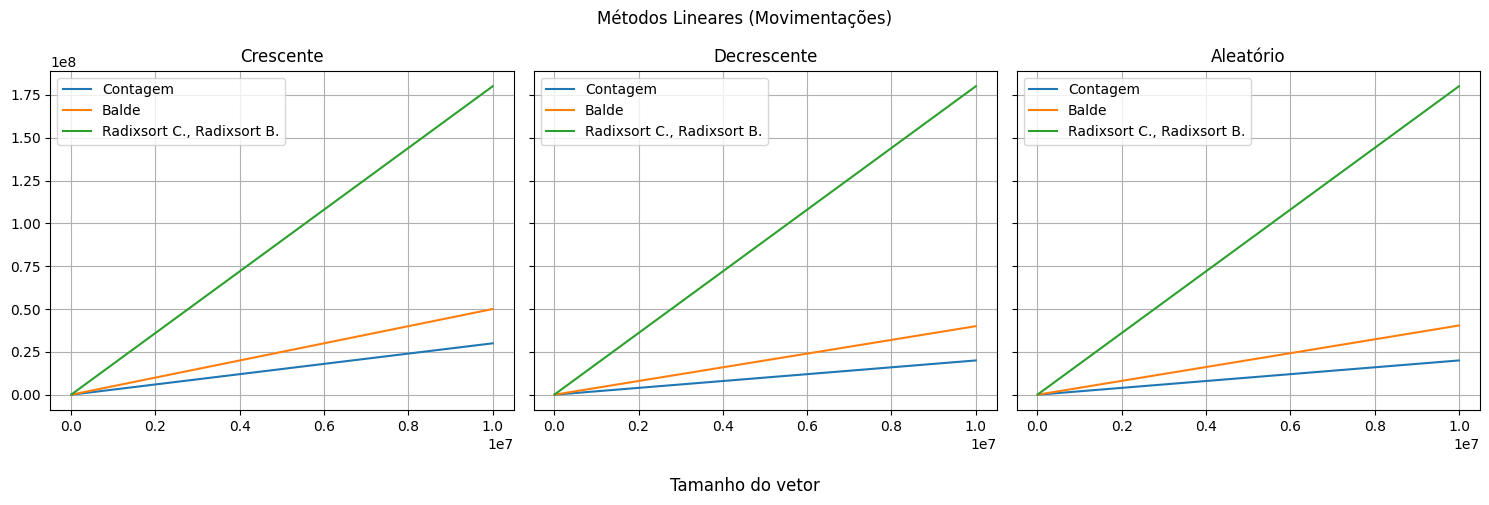

In [719]:
lin_reagrupados = lin_grupos.copy()
lin_reagrupados[0] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
lin_reagrupados[1] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
lin_reagrupados[2] = [['Contagem'], ['Balde'], ['Radixsort C.', 'Radixsort B.']]
plot_xy(titulo='Métodos Lineares', grupos=lin_reagrupados, ydata='movimentacoes')